# Dogs vs Cats
## Kaggle Dataset의 일부를 이용한 개, 고양이 구분
### 과제 --> full test 
- 0~9999는 train set
- 10000~1249는 test set
### 출처: [pontoregende GitHub](https://github.com/pontorezende/Dogs-vs-Cats-Redux-with-CNN)

In [1]:
import numpy as np    
from glob import glob
import cv2, os, random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
path='dogs-vs-cats/train/'

##### Train set 만들기

In [5]:
## used for resize and in our model
ROW, COL = 96, 96

dogs, cats = [], []
y_dogs, y_cats = [], []

In [6]:
dog_path = os.path.join(path, 'dog.*')
len(glob(dog_path))

12500

In [7]:
## Load some our dog images 
import shutil

fnames = ['dog.{}.jpg'.format(i) for i in range(10000)]

train_dog_dir = os.path.join(path, 'dogs_10000_train')
os.mkdir(train_dog_dir)

for dog_img in fnames:
    dog_path = os.path.join(path, dog_img)
    train_dataset = os.path.join(train_dog_dir, dog_img)
    shutil.copyfile(dog_path, train_dataset)

In [8]:
## Load some our cat images 

fnames1 = ['cat.{}.jpg'.format(i) for i in range(10000)]

train_cat_dir = os.path.join(path, 'cats_10000_train')
os.mkdir(train_cat_dir)

for cat_img in fnames1:
    cat_path = os.path.join(path, cat_img)
    train_dataset = os.path.join(train_cat_dir, cat_img)
    shutil.copyfile(cat_path, train_dataset)

In [9]:
classes = ['dog', 'cat']

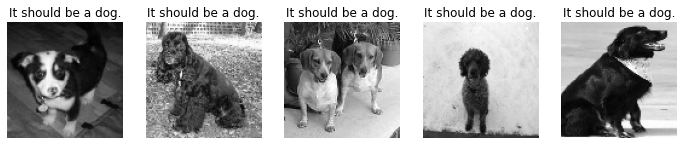

In [10]:
dog_train_path = 'dogs-vs-cats/train/dogs_10000_train/dog.*'

for dog_img in glob(dog_train_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)

plt.figure(figsize=(12,8))    
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))        
plt.show()

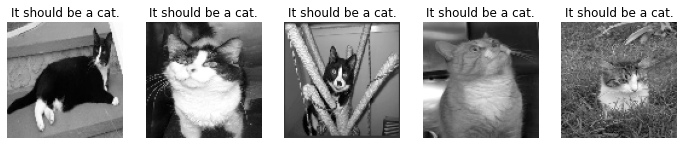

In [11]:
cat_train_path = 'dogs-vs-cats/train/cats_10000_train/cat.*'

for cat_img in glob(cat_train_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[1]))
plt.show()

In [12]:
## just change the labels for 0 and  1
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [13]:
y_dogs[:5]

[1, 1, 1, 1, 1]

In [14]:
y_dogs[0], y_cats[0]

(1, 0)

In [15]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [16]:
X_train = np.concatenate((dogs,cats), axis=0)
y_train = np.concatenate((y_dogs, y_cats), axis=0)

In [17]:
len(X_train)

20000

In [18]:
## One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, 2)

###### Test set 만들기

In [19]:
ROW, COL = 96, 96

dogs, cats = [], []
y_dogs, y_cats = [], []

In [20]:
## Load some our dog images 

fnames = ['dog.{}.jpg'.format(i) for i in range(10000,12500)]

test_dog_dir = os.path.join(path, 'dogs_2500_test')
os.mkdir(test_dog_dir)

for dog_img in fnames:
    dog_path = os.path.join(path, dog_img)
    test_dataset = os.path.join(test_dog_dir, dog_img)
    shutil.copyfile(dog_path, test_dataset)

In [21]:
## Load some our cat images 

fnames1 = ['cat.{}.jpg'.format(i) for i in range(10000,12500)]

test_cat_dir = os.path.join(path, 'cats_2500_test')
os.mkdir(test_cat_dir)

for cat_img in fnames1:
    cat_path = os.path.join(path, cat_img)
    test_dataset = os.path.join(test_cat_dir, cat_img)
    shutil.copyfile(cat_path, test_dataset)

In [22]:
dog_test_path = 'dogs-vs-cats/train/dogs_2500_test/dog.*'

for dog_img in glob(dog_test_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [23]:
cat_train_path = 'dogs-vs-cats/train/cats_2500_test/cat.*'

for cat_img in glob(cat_train_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)


In [24]:
## just change the labels for 0 and  1
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [25]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [26]:
X_test = np.concatenate((dogs,cats), axis=0)
y_test = np.concatenate((y_dogs, y_cats), axis=0)

In [27]:
len(X_test)

5000

In [28]:
## One-Hot Encoding
y_test = tf.keras.utils.to_categorical(y_test, 2)

###### 모델 설정

In [29]:
## Here is our model as a CNN
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, 1), 
           activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(2, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0

In [30]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])

In [31]:
## to save checkpoint to use later
modelpath = "model/dogs_vs_cats-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

##### 모델 학습

In [32]:
X_train.shape

(20000, 96, 96, 1)

In [33]:
y_train.shape

(20000, 2)

In [34]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2, 
          callbacks=[checkpointer, early_stopping_callback])

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
15968/16000 [============================>.] - ETA: 0s - loss: 0.6508 - accuracy: 0.6336
Epoch 00001: val_loss improved from inf to 0.85972, saving model to model/dogs_vs_cats-cnn-01-0.8597.hdf5
16000/16000 [==============================] - 305s 19ms/sample - loss: 0.6507 - accuracy: 0.6334 - val_loss: 0.8597 - val_accuracy: 0.3345
Epoch 2/10
15968/16000 [============================>.] - ETA: 0s - loss: 0.5575 - accuracy: 0.7078
Epoch 00002: val_loss improved from 0.85972 to 0.72689, saving model to model/dogs_vs_cats-cnn-02-0.7269.hdf5
16000/16000 [==============================] - 244s 15ms/sample - loss: 0.5572 - accuracy: 0.7079 - val_loss: 0.7269 - val_accuracy: 0.6100
Epoch 3/10
15968/16000 [============================>.] - ETA: 0s - loss: 0.4764 - accuracy: 0.7741
Epoch 00003: val_loss improved from 0.72689 to 0.55170, saving model to model/dogs_vs_cats-cnn-03-0.5517.hdf5
16000/16000 [==============================] 

In [37]:
from tensorflow.keras.models import load_model
del model
model = load_model('model/dogs_vs_cats-cnn-06-0.4948.hdf5')

In [38]:
scores = model.evaluate(X_test, y_test, verbose=2)
print('MODEL ACCURACY: %.5f' % scores[1])

5000/5000 - 14s - loss: 0.4310 - accuracy: 0.8034
MODEL ACCURACY: 0.80340
